# Understanding HSV color space

print(img.shape)
(400. 500, 3) 
 400 = no. of rows
 500 = no. of cols
 3 = no. of channels

# Maximum HSV value in opencv
h - 255
s - 255
v - 255

# Idea
-Increase saturation
-then then apply threshold
-if value <= 40 then

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [5]:
def showImage(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
bgrImg = cv2.imread('./dataset/ld1.jpg')
print(bgrImg.shape)
b,g,r = cv2.split(bgrImg)
rgbImg = cv2.merge([r,g,b])

#original image
plt.imshow(rgbImg)

In [ ]:
lt = rgbImg[340:370, 240:280]  #left top crop
lb = rgbImg[430:460, 70:110]  #left bottom crop

mt = rgbImg[340:370, 320:360]  #middle top crop
mb = rgbImg[400:430, 370:410]  #middle bottom crop

rt = rgbImg[340:370, 400:440]  #right top crop
rb = rgbImg[400:430, 590:630]  #right bottom crop



#plot it
plt.subplot(231), plt.imshow(lt)
plt.subplot(234), plt.imshow(lb)

plt.subplot(232), plt.imshow(mt)
plt.subplot(235), plt.imshow(mb)

plt.subplot(233), plt.imshow(rt)
plt.subplot(236), plt.imshow(rb)

In [ ]:
#convert to hsv
bgrImg = cv2.imread('./dataset/ld1.jpg')
b,g,r
hsv = cv2.cvtColor(bgrImg, cv2.COLOR_BGR2HSV)

#increase saturation
hsv[:,:,1] = 200  

#cvt to bgr
bgrImg = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)


#cvt to gray and threshold
gray = cv2.cvtColor(bgrImg, cv2.COLOR_BGR2GRAY)
plt.subplot(231), plt.imshow(gray, cmap='gray')

_, threshGray = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)
plt.subplot(232), plt.imshow(threshGray, cmap='gray')

#convert back to rgb
rgbImg = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.subplot(233), plt.imshow(rgbImg)

#adaptive
adp = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
plt.subplot(234), plt.imshow(adp)

adpGau = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
plt.subplot(234), plt.imshow(adpGau)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(gray,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(235), plt.imshow(th3)

#apply canny on gray
canny = cv2.Canny(gray, 170, 255)
plt.subplot(236), plt.imshow(canny)

#hold screen
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
lt = hsv[340:370, 240:280]  #left top crop
lb = hsv[430:460, 70:110]  #left bottom crop

mt = hsv[340:370, 320:360]  #middle top crop
mb = hsv[400:430, 370:410]  #middle bottom crop

rt = hsv[340:370, 400:440]  #right top crop
rb = hsv[400:430, 590:630]  #right bottom crop

#print hsv value
rows, cols, ch = mt.shape
v = []
for i in range(rows):
    for j in range(cols):
        print(mt[i,j],end='')

#cvt to rgb
#rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
#plt.imshow(rgb)

In [ ]:

#mask for hsv
lw = np.array([0,0, 80], np.uint8)
up = np.array([255,255, 255], np.uint8)
mask = cv2.inRange(hsv, lw, up)
res = cv2.bitwise_and(hsv, hsv, mask)
rgb = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(rgb)

#thresholding
#print hsv value
rows, cols, ch = hsv.shape
v = []
for i in range(rows):
    for j in range(cols):
        v.append(mt[i,j,2])

In [ ]:
m = filter_color(hsv)
cv2.imshow('hsv',m)
cv2.waitKey(0)

In [ ]:
def hsvFilter(img, thresh=100):
    '''
    img: BGR image
    '''
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    v = hsv[:,:,2]
    showImage(v, 'gray')
    binImg = np.zeros_like(v)
    binImg[v >= thresh] = 255
    binImg[v < thresh] = 0 
    return binImg

In [ ]:
bgr = cv2.imread('./dataset/ld1.jpg')
showImage(bgr, 'ori')
thresh = 110
binImg = hsvFilter(bgr, thresh)
showImage(binImg, 'bin')

rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
plt.subplot(231), plt.imshow(rgb)
plt.subplot(232), plt.imshow(binImg)

In [3]:
def region_of_interest(img, vertices):
    # Define a blank matrix that matches the image height/width.
    mask = np.zeros_like(img)
    
    #check if image is grayscale or color
    shape = img.shape
    if(len(shape) == 3):               #its a color image
        mask_color = (255,)*shape[-1]   #shape[-1] = no. at last index
    else:                              #otherwise its a gray image
        mask_color = 255
      
    # Fill the polygon with white
    cv2.fillPoly(mask, vertices, mask_color)
    
    # Returning the image only where mask pixels match
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

# apply sobel

In [25]:
def applySobel(img, orient = 'x', kernel=3, th=100, blackWhite=(0, 255)):
    #cvt to gray
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #extract vertical or horizontal line
    if orient == 'x':
        absSobel = np.absolute(cv2.Sobel(img, cv2.CV_64F, 1, 0))
    else:
        absSobel = np.absolute(cv2.Sobel(img, cv2.CV_64F, 0, 1))
        
    #rescale to 8 bit
    scaled = np.uint8(255*absSobel/np.max(absSobel))
    
    #create a blank image and apply thresh
    op = np.zeros_like(scaled)
    op[scaled > th] = blackWhite[1] #white
    op[scaled < th] = blackWhite[0] #black
    
    return op

# Plot histogram

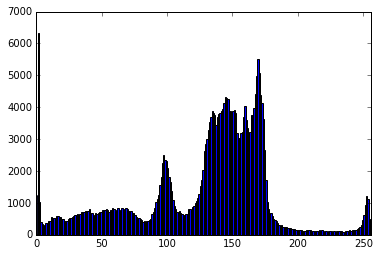

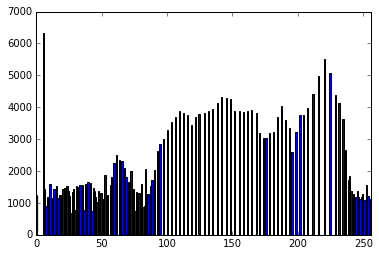

In [15]:
gray = cv2.imread('./dataset/ld1.jpg', 0)
plt.hist(gray.flatten(), 256, [0, 256])
plt.xlim([0, 256])
plt.show()

#equalize using hist
hist = cv2.equalizeHist(gray)
plt.hist(hist.flatten(), 256, [0, 256])
plt.xlim([0, 256])
plt.show()

# Histogram

In [ ]:
height, width = gray.shape
cv2.imshow('gray', gray)

#keeping the portion of image which contains lane
topLeftPt = (width*0.30, height*0.60)
topRightPt = (width*0.70, height*0.60)

#this portion contain road
region_of_interest_points = [
(0, height*0.90),
#(0, height*0.60),
topLeftPt,
topRightPt,
#(width, height*0.60),
(width, height*0.90),
]

print(region_of_interest_points)
roi = region_of_interest(gray, np.array([region_of_interest_points], np.int32))
cv2.imwrite('./dataset/roi.jpg', roi)
cv2.imshow('roi', roi)

#equalize using hist
hist = cv2.equalizeHist(roi)
cv2.imwrite('./dataset/histRoi2.jpg', roi)
cv2.imshow('equ',hist)

#plt
plt.subplot(121), plt.imshow(gray, cmap='gray')
plt.subplot(122), plt.imshow(hist, cmap='gray')

cv2.waitKey(0)
cv2.destroyAllWindows()

# Apply canny

In [35]:
img = cv2.imread('./dataset/hist1.jpg')
img = cv2.Canny(img, 80, 185)
showImage('canny',img)
img = applySobel(img, 'x', 31)
cv2.imwrite('./dataset/sobelx31OnCanny.jpg', img)
showImage('canny',img)